In [4]:
import torch
from utils_general import *

In [22]:
import torch
import numpy as np
import random
import ipdb
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from utils_sphere import *

AVOID_ZERO_DIV = 1e-12
FORCE_POSITIVE_WEIGHT = -1e-6

def plot_stats(stats, log_scale):
    
    
    fig = plt.figure(figsize = [15,7])
    fig.patch.set_facecolor('white')
    gs = fig.add_gridspec(1,1)
    
    for j,i in enumerate([1,5,10,50,100]):
        acc = stats[i]["acc"]
        loss = stats[i]["loss"]
        ana_err = stats[i]["ana_err"]
        alpha = stats[i]["alpha"]
        iteration = stats[i]["iteration"]
        len_err = len(ana_err)
        err_freq = int(iteration/len_err)
        iteration_list = list(range(err_freq, (len_err+1) * err_freq, err_freq))
        fig.add_subplot(gs[0,0]).plot(iteration_list, alpha[:,0], "C"+str(j), label = r"$\epsilon$ = 0.01, itr = "+str(i), linewidth=3.0, marker = "")
    
    acc = stats["clean"]["acc"]
    loss = stats["clean"]["loss"]
    ana_err = stats["clean"]["ana_err"]
    alpha = stats["clean"]["alpha"]
    iteration = stats["clean"]["iteration"]
    len_err = len(ana_err)
    err_freq = int(iteration/len_err)
    iteration_list = list(range(err_freq, (len_err+1) * err_freq, err_freq))
    fig.add_subplot(gs[0,0]).plot(iteration_list, alpha[:,0], "C9", label = "Standard", linewidth=3.0, marker = "")

    acc = stats["truemax"]["acc"]
    loss = stats["truemax"]["loss"]
    ana_err = stats["truemax"]["ana_err"]
    alpha = stats["truemax"]["alpha"]
    iteration = stats["truemax"]["iteration"]
    len_err = len(ana_err)
    err_freq = int(iteration/len_err)
    iteration_list = list(range(err_freq, (len_err+1) * err_freq, err_freq))
    fig.add_subplot(gs[0,0]).plot(iteration_list, alpha[:,0], "C8", label = "Truemax", linewidth=3.0, marker = "")


#     fig.add_subplot(gs[0,0]).plot(stats[10]["alpha"][:,0], "C3", label = r"$\alpha = 0.1, itr = 10$", linewidth=3.0, marker = "o")
#     fig.add_subplot(gs[0,0]).plot(stats[50]["alpha"][:,0], "C4", label = r"$\alpha = 0.1, itr = 50$", linewidth=3.0, marker = "o")
#     fig.add_subplot(gs[0,0]).plot(stats[100]["alpha"][:,0], "C5", label = r"$\alpha = 0.1, itr = 100$", linewidth=3.0, marker = "o")


    fig.add_subplot(gs[0,0]).set_title(r"Percentage of $\alpha_i \in [1/r^2, 1]$" , fontsize = 25)
    fig.add_subplot(gs[0,0]).set_xlabel("iterations", fontsize = 25)
    
    if log_scale == True:
        fig.add_subplot(gs[0,0]).ticklabel_format(style='sci', axis='x', scilimits=(5,5))
        fig.add_subplot(gs[0,0]).set_xscale("log")


    fig.add_subplot(gs[0,0]).grid(which="both")
    fig.add_subplot(gs[0,0]).tick_params(labelsize=20)
    fig.add_subplot(gs[0,0]).legend(prop={"size": 20})


    fig.tight_layout()
    
    return fig


In [23]:
stats_clean = torch.load("./result/453840/stats.pt")
stats_truemax = torch.load("./result/453841/stats.pt")

stats_a001_it1 = torch.load("./result/453843/stats.pt")
stats_a001_it5 = torch.load("./result/453845/stats.pt")
stats_a001_it10 = torch.load("./result/453847/stats.pt")
stats_a001_it50 = torch.load("./result/453849/stats.pt")
stats_a001_it100 = torch.load("./result/453851/stats.pt")

stats = {"truemax": stats_truemax, "clean": stats_clean, 1:stats_a001_it1, 5: stats_a001_it5, 10: stats_a001_it10, 50: stats_a001_it50, 100: stats_a001_it100}



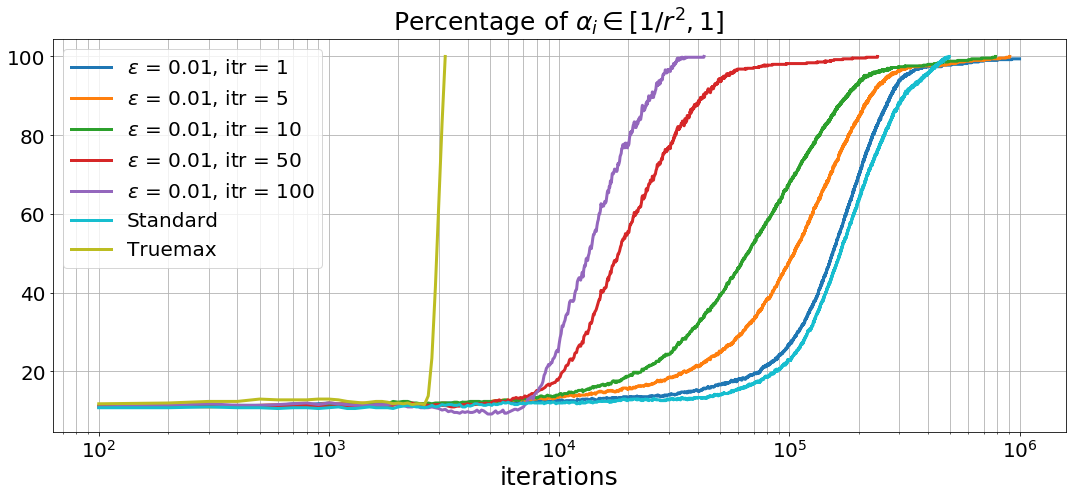

In [24]:
fig = plot_stats(stats, True)